# Анализ рынка компьютерных игр

## Описание проекта 

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Перед вами данные до 2016 года. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Задача

На основании исторических данных о продажах игр, оценок пользователей и экспертов, жанров и платформ из открытых источников, необходимо выявить закономерности определяющие успешность игры, для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Открытие файла с данными и изучение общей информации

Импортирую библиотеки и открываю файл с данными

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/datasets/games.csv')

Изучаю общую информацию о таблице

In [2]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.tail(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


На первый взгляд, можно сказть, что в таблице имеются пропущенные значения, видны несоответствия типов, в наименованиях столбцов присутствуют символы в верхнем регистре, также в строковых значениях в столбцах неоднородный регистр. По данным видно, что в таблице представлены игры с 1980 года и оценки критиков выставлены по 100 бальной шкале, а вот оценки пользователей выставлены по 10 бальной шкале и в значениях присутствует аббревиатура 'tbd'.

### Подготовка данных для дальнейшего исследования

Первым делом, приведу названия столбов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Так же, в столбцах содержащих текст заметен разный регистр, для удобства восприятия и чтобы избежать проблем с дубликатами, приведу все эти значения к нижнему регистру.

In [8]:
df_lower = ['name', 'platform', 'genre', 'rating']
for value in df_lower:
    df[value] = df[value].str.lower()

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Далее я посчитаю количество пропусков в колонках и проверю на соответствие типы их данных.

In [10]:
missing_val_count_by_column = (df.isna().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Видны несоответствие типов в клонках `year_of_release`, `critic_score` и `user_score`, а также пропущенные значения в основном присутствут в колонках с рейтингом и оценками, могу предположить, что данные пропуски относятся не к популярным играм. Разберу каждую колонку по отдельности.

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В колонке `name` два пропуска, характер которых не понятен, они же соответсвуют строкам пропущенных значений в колонке `genre`. Думаю, данные строки стоит удалить, они не на что не влияют.

In [13]:
df = df.dropna(subset=['name'])
df['name'].isna().sum()

0

In [14]:
df['genre'].isna().sum()

0

Теперь рассмотрю колонки содержащие пропуски с данными об оценках.

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Пропуски в колонках вероятнее всего связаны с тем, что либо игра не популярна и ей в связи с этим не ставят оценки, либо данную игру не внесли официально в рейтинг, опять же из-за не популярности, либо же игра была выпущена до появления различных оценивающих платформ. Заменю пропуски на значение "not_rating", для того чтобы в дальнейшем можно было соотнести продажи в зависимости от рейтинга или отсутствии его.

In [18]:
df['rating'].fillna('not_rating', inplace=True)

In [19]:
df['rating'].unique()

array(['e', 'not_rating', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

В колонке `user_score` в отличие от колонок `critic_score` и `rating`, помимо пропущенных значений присутствует аббревиатура **'tbd'**, которая означает **"to be determined = будет определено"**, за счет этой аббревиатуры колонка приняла тип данных 'object'. Заменю значения 'tbd' на NaN, так как это значение ни чем не отличается в данной ситуации от NaN, и приведу данную колонку к числовому типу. В колонке `critic_score` изменю тип данных на целочисленный, так как все значения целочисленные. И так как заполнить пропуски в колонках с оценками я не могу, то просто данные пропуски оставлю пустыми.

In [20]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

In [21]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [22]:
df['critic_score'] = df['critic_score'].convert_dtypes('int')

In [23]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

Далее рассмотрю пропуски в колонке `year_of_release`

In [24]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,<NA>,NaN,not_rating
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,<NA>,NaN,not_rating


В данной колонке небольшое количество пропусков, эти пропуски возможно связаны с ошибкой при загрузке данных, можно было бы их заменить по имени и датой выхода для другой платформы, но это может быть не достоверно, так как разработчики могут в разное время выпускать игры для разных платформ, либо можно искать по отдельности дату релиза игры для конкретной платформы, что усложнит работу и займет много времени, поэтому проще всего данные пропуски удалить. Так же приведу данную колонку к целочисленному типу данных.

In [25]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum()

0

In [26]:
df['year_of_release'] = df['year_of_release'].astype('int')

Проверю еще таблицу на явные дубликаты

In [27]:
df.duplicated().sum()

0

Теперь посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец

In [28]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,not_rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,not_rating,31.38


**Вывод:**

В ходе подготовки данных было выполнено следующее:
- Были приведены строковые значения и названия столбцов к единому нижнему регистру
- Обработаны пропуски в колонках
- Преобразованы данные к соответствующим типам данных
- Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

### Исследовательский анализ данных

Первым делом посмотрю сколько игр выпускалось в разные годы

In [30]:
game_year = df.groupby('year_of_release').agg(game=('name', 'count'))

In [31]:
game_year

,game
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


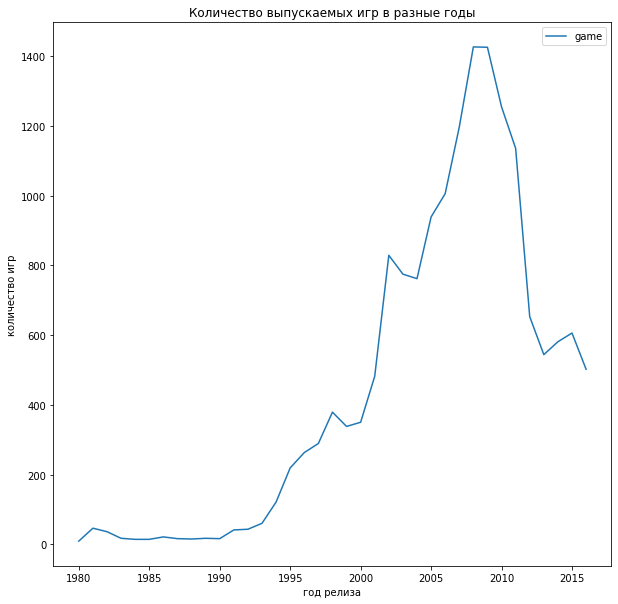

In [32]:
game_year.plot(figsize=(10,10), title = 'Количество выпускаемых игр в разные годы')\
    .set(ylabel='количество игр', xlabel='год релиза')
plt.show()

Можно заметить что игры активно выпускались с 2006 по 2011 год. Пик выпущенных игр пришелся на 2008-2009 годы, в 2012 году начинается резкое снижение выпускаемых игр, думаю это связано с развитием графических технологий и игры становятся более сложными в разработке, а так же с развитием мобильных игр на смартфонах и игр в социальных сетях. Люди стали больше играть в мобильные игры и онлайн игры в социальных сетях.

Теперь меня интересует, как менялись продажи на различных платформах с наибольшими суммарными продажами с распределением по годам.

Для начала найду список топ 10 платформ с наибольшим количеством продаж.

In [33]:
top10_game = df.groupby('platform').agg(total_sales=('total_sales', 'sum'))\
    .sort_values(by='total_sales', ascending=False).head(10)

In [34]:
top10_game

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [35]:
top10_game_list = list(top10_game.index)

Глядя на на топ 10 платформ с максимальными продажами, можно заметить, что основными лидерами являются платформы PlayStation. Построю теперь график с распределением продаж по годам по топовым платформам, чтобы посмотреть за какой характерный срок появляются новые и исчезают старые платформы.

In [36]:
top10_game_plot = df.query('platform in @top10_game_list').reset_index(drop = True)

In [37]:
top10_game_plot = top10_game_plot.pivot_table(
    index='year_of_release', columns='platform',
    values='total_sales', aggfunc='sum').fillna(0)

In [38]:
top10_game_plot

platform,3ds,ds,gba,ps,ps2,ps3,ps4,psp,wii,x360
year_of_release,,,,,,,,,,
1985,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994,0.00,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,0.07,96.37,39.17,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,61.53,35.59,166.43,0.00,0.00,0.00,0.00,0.00


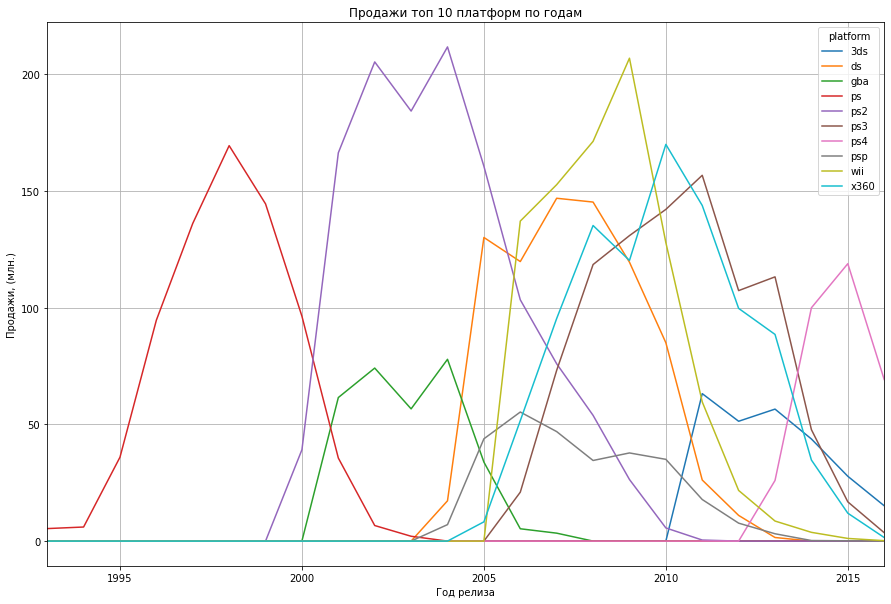

In [39]:
top10_game_plot.plot(
    figsize=(15,10), grid=True, xlim=(1993, 2016),
    ylabel='Продажи, (млн.)', xlabel='Год релиза',
    title = 'Продажи топ 10 платформ по годам'
) 
plt.show()

По графику видно, что примерно в среднем платформы живут 10-12 лет и чаще новые платформы появляются начиная с 2005 года. А пик продаж у платформ наступает примерно через 4-5 лет и далее идет на спад. Так же можно заметить, что спад платформ пошел примерно с 2012 года. 

Теперь выделю актуальный период, возьму за его основу последние 3 года и выделю в этот период новую десятку лидеров продаж, который поможет построить прогноз на 2017 год.

In [40]:
df_actual = df.query('year_of_release >= 2014')

In [41]:
top10_game_actual = df_actual.groupby('platform').agg(total_sales=('total_sales', 'sum'))\
    .sort_values(by='total_sales', ascending=False).head(10)

In [42]:
top10_game_actual

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


In [43]:
top10_actual_list = list(top10_game_actual.index)

Список лидеров не много изменился, но неизменным лидером все еще остается PlayStation. Построю график, чтобы посмотреть, как распределялись продажи за актуальный период.

In [44]:
top10_actual_plot = df_actual.query('platform in @top10_actual_list').reset_index(drop = True)

In [45]:
top10_actual_plot = top10_actual_plot.pivot_table(
    index='year_of_release', columns='platform',
    values='total_sales', aggfunc='sum').fillna(0)

In [46]:
top10_actual_plot

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


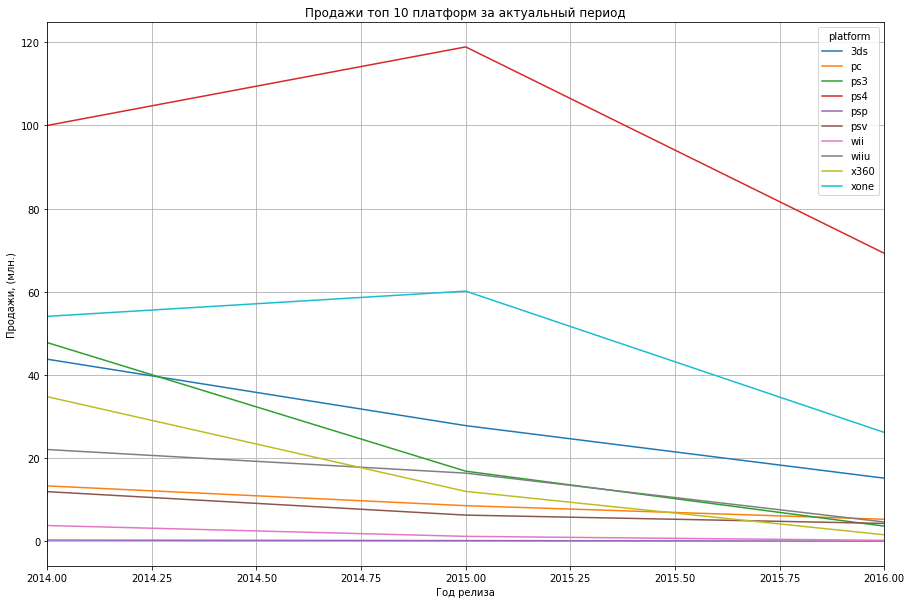

In [47]:
top10_actual_plot.plot(
    figsize=(15,10), grid=True, xlim=(2014, 2016),
    ylabel='Продажи, (млн.)', xlabel='Год релиза',
    title = 'Продажи топ 10 платформ за актуальный период'
) 
plt.show()

Можно заметить, что продажи практически у всех платформ за данный период падают. Только у ps4 и xone на протяжении первой половины актуального периода продажи растут и только после наступления 2015 года, продажи не много идут на спад. Но они все же остаются потенциально прибыльными платформами и это логично -  старые платформы начинают уходить, а рынок занимают новые.

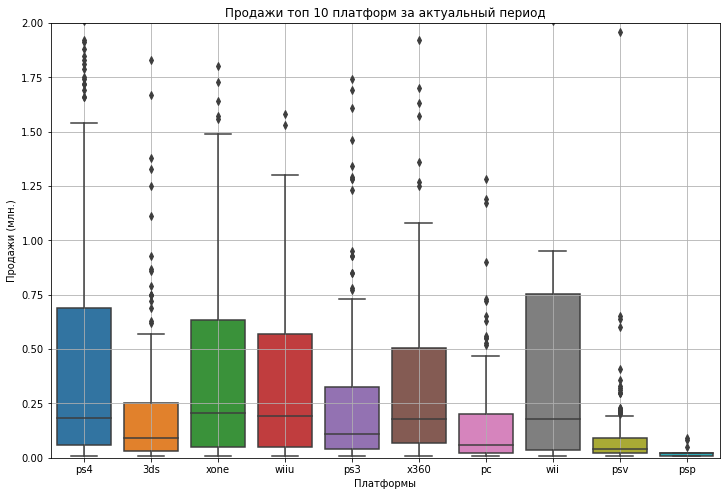

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=df_actual)
plt.ylim([0, 2])
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.)')
plt.title('Продажи топ 10 платформ за актуальный период')
plt.grid(True)
plt.show()

По диаграмме размаха опять же можно выделить лидеров xone и ps4. Так же стоит обратить отдельное внимание wiiu, у данной платформы хоть и выручка меньше, но зато средняя стоимость продаж выше. Не много отстают от лидеров x360 и wii, а вот psp на последнем месте. Опять же повторюсь, старые платформы начинают уходить, а рынок занимают новые.

Теперь стоит рассмотреть, как влияют отзывы пользователей и критиков на продажи внутри самой попуярной платформы ps4 в актуальном периоде.

In [49]:
df_ps4 = df_actual.query('platform == "ps4"')
df_ps4 = df_ps4.query('critic_score.isna() == False')
df_ps4 = df_ps4.query('user_score.isna() == False')
df_ps4 = df_ps4[['total_sales','critic_score', 'user_score', 'platform']]

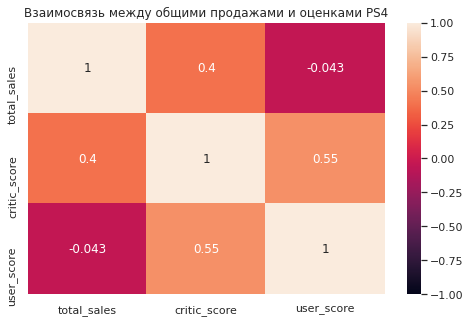

In [50]:
sns.set(font_scale=1)
plt.figure(figsize=(8,5))
plt.title('Взаимосвязь между общими продажами и оценками PS4')
sns.heatmap(
    df_ps4.corr(),
    annot=True,
    vmin=-1, vmax=1)
plt.show()

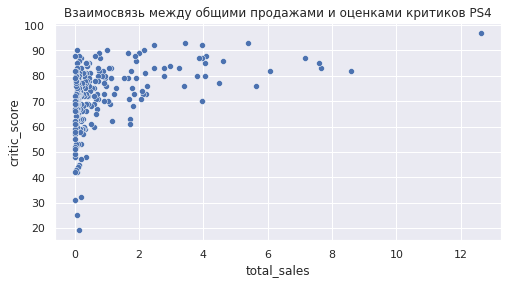

In [51]:
plt.figure(figsize=(8,4))
plt.title('Взаимосвязь между общими продажами и оценками критиков PS4')
sns.scatterplot(x='total_sales', y='critic_score', data=df_ps4, markers=True)
plt.show()

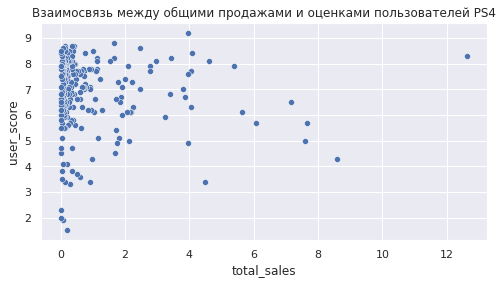

In [52]:
plt.figure(figsize=(8,4))
plt.title('Взаимосвязь между общими продажами и оценками пользователей PS4')
sns.scatterplot(x='total_sales', y='user_score', data=df_ps4, markers=True)
plt.show()

Глядя на графики и корреляцию, можно утверждать, что оценки пользователей не влияют на продажи платформы ps4 в актуальном периоде, а вот оценками критиков наоборот влияют на продажи. Думаю, это связано с тем, что решение пользователей о покупке игры основывается на оценках критиков. 

Далее рассмотрю, как оценки критиков и пользователей влияют на продажи других платформ внутри актуального периода.

In [53]:
df_score = df_actual.query('platform != "ps4"')
df_score = df_score.query('critic_score.isna() == False')
df_score = df_score.query('user_score.isna() == False')
df_score = df_score[['total_sales','critic_score', 'user_score', 'platform']]

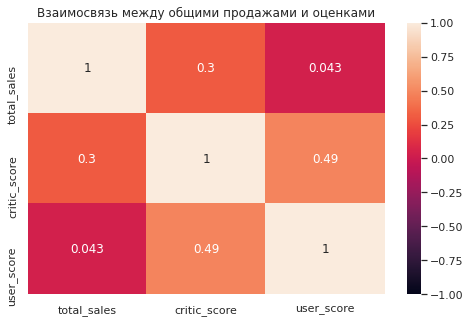

In [54]:
sns.set(font_scale=1)
plt.figure(figsize=(8,5))
plt.title('Взаимосвязь между общими продажами и оценками')
sns.heatmap(
    df_score.corr(),
    annot=True,
    vmin=-1, vmax=1)
plt.show()

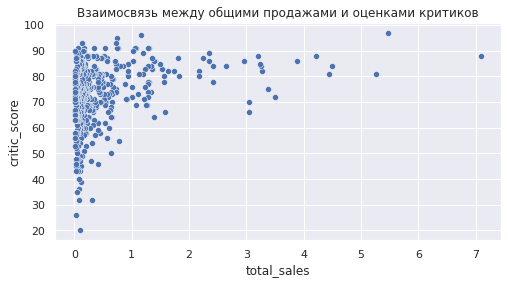

In [55]:
plt.figure(figsize=(8,4))
plt.title('Взаимосвязь между общими продажами и оценками критиков')
sns.scatterplot(x='total_sales', y='critic_score', data=df_score, markers=True)
plt.show()

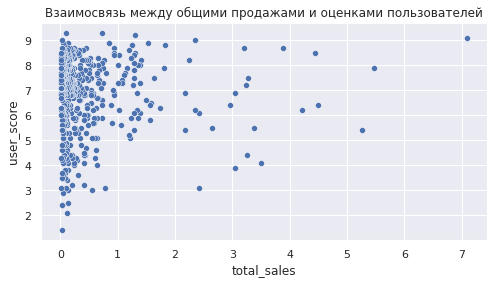

In [56]:
plt.figure(figsize=(8,4))
plt.title('Взаимосвязь между общими продажами и оценками пользователей')
sns.scatterplot(x='total_sales', y='user_score', data=df_score, markers=True)
plt.show()

Глядя на корреляцию и графики для всех остальных платформ, можно заметить, что ситуация практически аналогичная, что и с платформой PS4. Оценки критиков влияют на продажи, а оценки пользователей нет.

Теперь стоит определить самые популярные и прибыльные жанры.

In [57]:
df_genre = df_actual.groupby('genre').agg(total_sales=('total_sales', 'sum'))\
    .sort_values(by='total_sales', ascending=False)

In [58]:
df_genre

,total_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


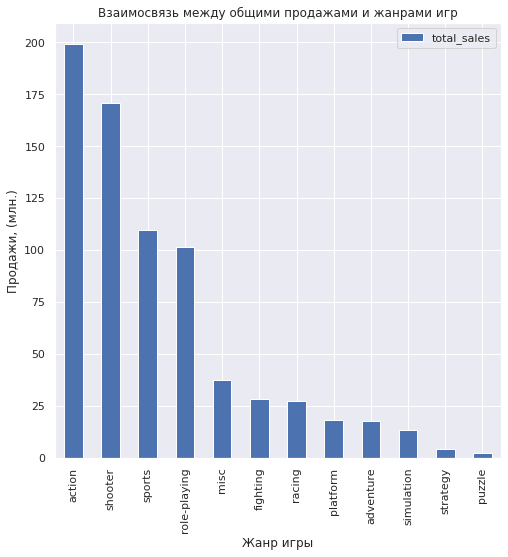

In [59]:
df_genre.plot.bar(figsize=(8,8)).set(ylabel='Продажи, (млн.)', xlabel='Жанр игры')
plt.title('Взаимосвязь между общими продажами и жанрами игр')
plt.show()

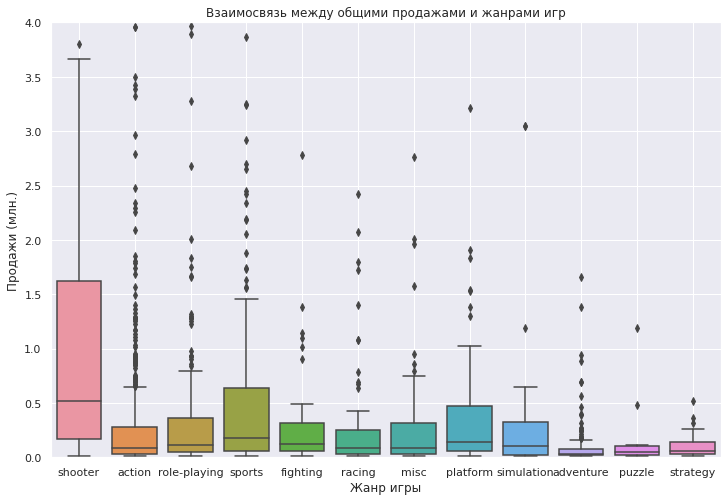

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=df_actual)
plt.ylim([0, 4])
plt.xlabel('Жанр игры')
plt.ylabel('Продажи (млн.)')
plt.title('Взаимосвязь между общими продажами и жанрами игр')
plt.grid(True)
plt.show()

Изучив графики, замечу, что наибольшая выручка за актуальный период у жанра action, но при этом у жанра shooter самые высокие средние продажи, в отличие от action. Самыми не актуальными жанрами являются интеллектуальный жанры, это можно заметить по низким общим и средним продажам. 

**Вывод:**

После проведения исследовательского анализа, можно отметить следующее:
1. Пик выпуска компьютерных игр пришелся на 2006-2011 годы.
2. С 2012 года происходит стабильный спад спроса на игры.
3. Самые популярные платформы относятся к Playstation и Xbox.
4. В среднем, срок жизни платформы 10-12 лет.
5. Пик продаж у платформы происходит на 4-5 год, далее продажи идут на спад.
6. Новые платформы активно стали появляться с 2005 года.
7. Отзывы критиков имеют небольшой вес на продажи игр, а вот оценки пользователей не влияют на продажи.
8. Самыми популярными жанрами игр являются action и shooter.
9. К самым не популярным жанрам относятся интеллектуальные игры.

### Портрет пользователя для каждого региона

Для начала, стоит определить пятерку самых популярных платформ для каждого региона.

In [61]:
def plot(x, y, data, name_x, name_y, title):
    display(data)
    plt.figure(figsize=(10,8))
    sns.barplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.grid(True)
    plt.show()

Первым делом определю популярные платформы в Европе.

In [62]:
top5_platform_eu = df_actual.groupby('platform', as_index=False).agg(eu_sales=('eu_sales', 'sum'))\
    .sort_values(by='eu_sales', ascending=False).head()
top5_platform_eu['ratio'] = (top5_platform_eu['eu_sales']/df_actual['eu_sales'].sum()*100).round()

,platform,eu_sales,ratio
3,ps4,130.04,48.0
9,xone,46.25,17.0
2,ps3,25.54,9.0
1,pc,17.97,7.0
0,3ds,16.12,6.0


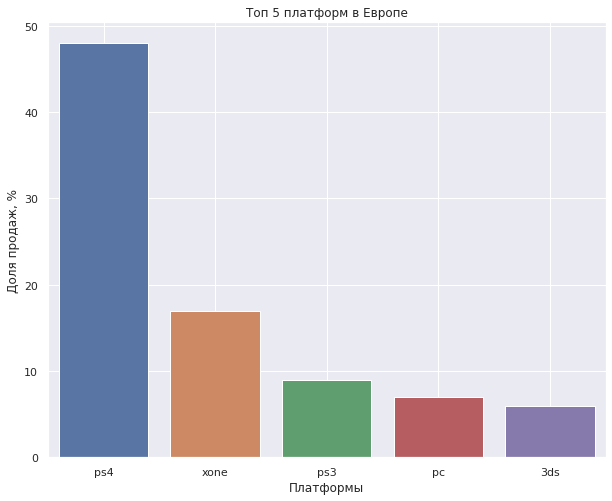

In [63]:
plot('platform', 'ratio', top5_platform_eu, 'Платформы', 'Доля продаж, %', 'Топ 5 платформ в Европе')

В Европе в значительной степени преобладает платформа PS4. Теперь посмотрю какие платформы популярны в Северной Америке.

In [64]:
top5_platform_na = df_actual.groupby('platform', as_index=False).agg(na_sales=('na_sales', 'sum'))\
    .sort_values(by='na_sales', ascending=False).head()
top5_platform_na['ratio'] = (top5_platform_na['na_sales']/df_actual['na_sales'].sum()*100).round()

,platform,na_sales,ratio
3,ps4,98.61,35.0
9,xone,81.27,29.0
8,x360,28.30,10.0
0,3ds,22.64,8.0
2,ps3,22.05,8.0


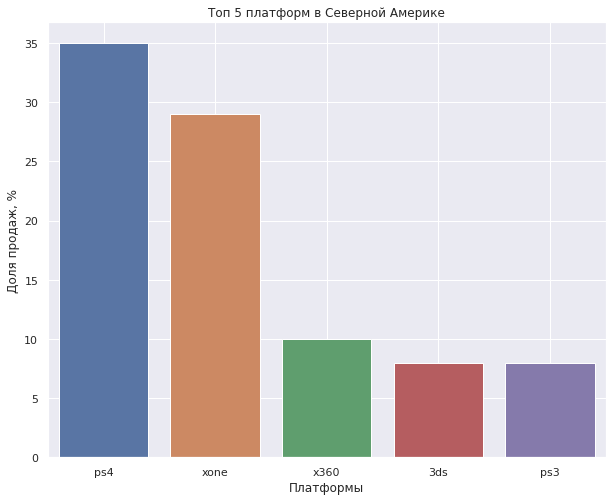

In [65]:
plot('platform', 'ratio', top5_platform_na, 'Платформы', 'Доля продаж, %', 'Топ 5 платформ в Северной Америке')

В Северной Америке пользователи в основном предпочитают Playstation и Xbox. Осталось посмотреть, какие платформы в большей степени преобладают в Японии.

In [66]:
top5_platform_jp = df_actual.groupby('platform', as_index=False).agg(jp_sales=('jp_sales', 'sum'))\
    .sort_values(by='jp_sales', ascending=False).head()
top5_platform_jp['ratio'] = (top5_platform_jp['jp_sales']/df_actual['jp_sales'].sum()*100).round()

,platform,jp_sales,ratio
0,3ds,44.24,48.0
3,ps4,15.02,16.0
5,psv,14.54,16.0
2,ps3,11.22,12.0
7,wiiu,7.31,8.0


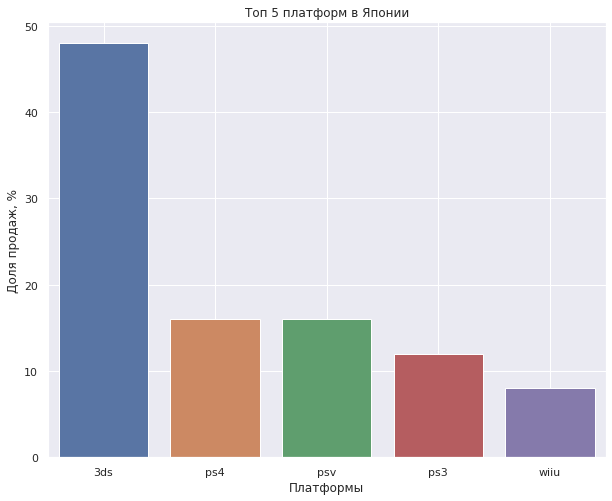

In [67]:
plot('platform', 'ratio', top5_platform_jp, 'Платформы', 'Доля продаж, %', 'Топ 5 платформ в Японии')

Предпочтения в Японии координально отличаются от Европы и Северной Америки, самой популярной платформой является 3DS, которая в свою очередь в Европе и Сверной Америке занимает лишь 4 и 5 место.

Теперь рассмотрю топ 5 самых побулярных жанров для этих же регионов. Первая будет Европа.

In [68]:
top5_genre_eu = df_actual.groupby('genre', as_index=False).agg(eu_sales=('eu_sales', 'sum'))\
    .sort_values(by='eu_sales', ascending=False).head()

,genre,eu_sales
0,action,74.68
8,shooter,65.52
10,sports,45.73
7,role-playing,28.17
6,racing,14.13


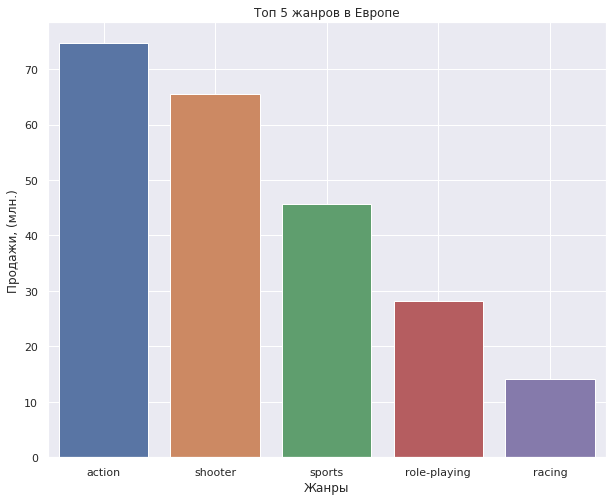

In [69]:
plot('genre', 'eu_sales', top5_genre_eu, 'Жанры', 'Продажи, (млн.)', 'Топ 5 жанров в Европе')

В Европе лидируют жанры action и shooter, как и в случае при рассмотрении всех регионов. Теперь стоит посмотреть какие жанры популярны в Северной Америке.

In [70]:
top5_genre_na = df_actual.groupby('genre', as_index=False).agg(na_sales=('na_sales', 'sum'))\
    .sort_values(by='na_sales', ascending=False).head()

,genre,na_sales
8,shooter,79.02
0,action,72.53
10,sports,46.13
7,role-playing,33.47
3,misc,15.05


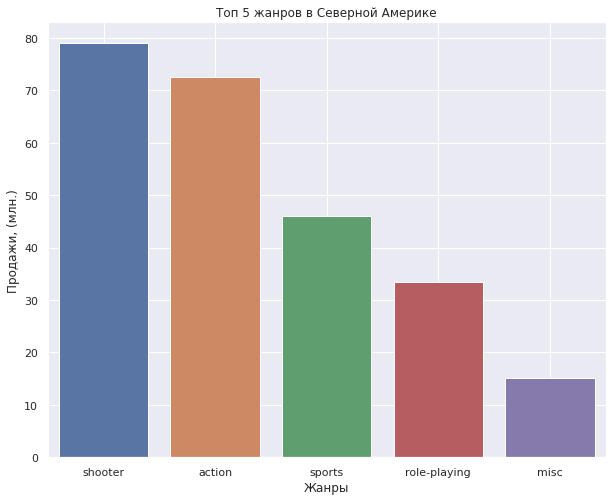

In [71]:
plot('genre', 'na_sales', top5_genre_na, 'Жанры', 'Продажи, (млн.)', 'Топ 5 жанров в Северной Америке')

В Северной Америке на первом месте жанр shooter, на втором action, в Европе наоборот. Но в общем, в Северной Америке, популярны те же самые жанры, что и в Европе. Только есть небольшое отличие на 5 строчке, в Северной Америке больше пользуется спросом жанр misc, а в Европе racing. Осталось рассмотреть популярные жанры в Японии.

In [72]:
top5_genre_jp = df_actual.groupby('genre', as_index=False).agg(jp_sales=('jp_sales', 'sum'))\
    .sort_values(by='jp_sales', ascending=False).head()

,genre,jp_sales
7,role-playing,31.16
0,action,29.58
2,fighting,6.37
3,misc,5.61
8,shooter,4.87


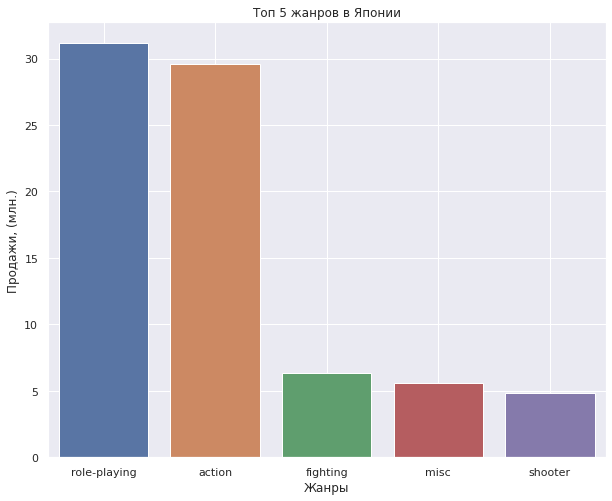

In [73]:
plot('genre', 'jp_sales', top5_genre_jp, 'Жанры', 'Продажи, (млн.)', 'Топ 5 жанров в Японии')

Япония опять отличается от Европы и Северной Америки по предпочтениям. Жанр role-playing является самым популярным, action на втором месте, a вот shooter вообще занимает лишь 5 место.

Далее стоит рассмотреть, влияет ли рейтинг ESRB на продажи в зависимости от региона. Рассмотрю первой Европу.

In [74]:
rating_eu = df_actual.groupby('rating', as_index=False).agg(eu_sales=('eu_sales', 'sum'))\
    .sort_values(by='eu_sales', ascending=False).head()

,rating,eu_sales
2,m,93.44
3,not_rating,58.95
0,e,58.06
4,t,34.07
1,e10+,26.16


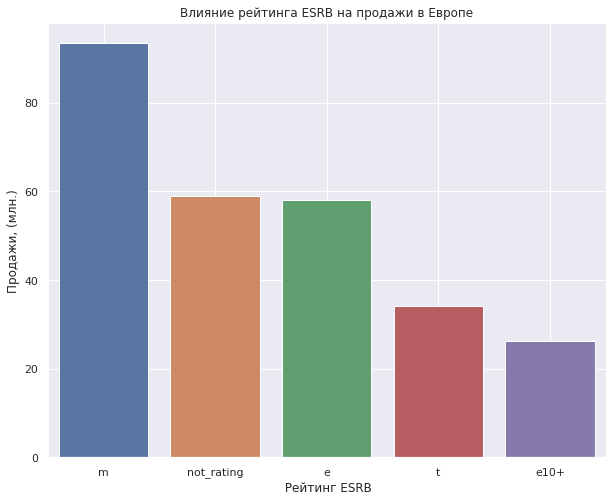

In [75]:
plot('rating', 'eu_sales', rating_eu, ' Рейтинг ESRB', 'Продажи, (млн.)', 'Влияние рейтинга ESRB на продажи в Европе')

В Европе преобладают продажи игр для взрослых с  рейтингом М(17+).

In [76]:
rating_na = df_actual.groupby('rating', as_index=False).agg(na_sales=('na_sales', 'sum'))\
    .sort_values(by='na_sales', ascending=False).head()

,rating,na_sales
2,m,96.42
3,not_rating,64.72
0,e,50.74
4,t,38.95
1,e10+,33.23


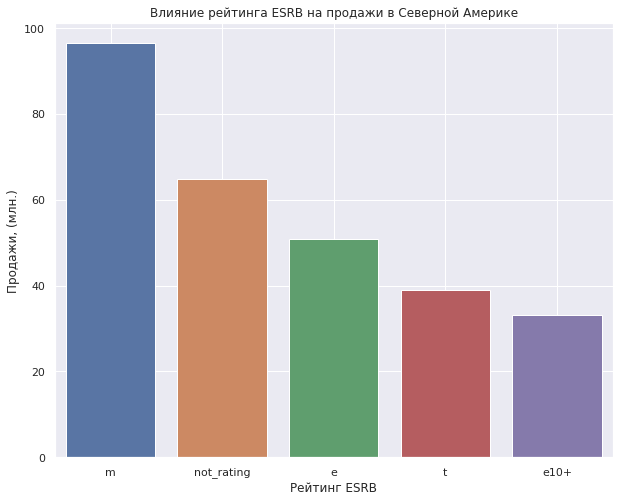

In [77]:
plot('rating', 'na_sales', rating_na, 'Рейтинг ESRB', 'Продажи, (млн.)', 'Влияние рейтинга ESRB на продажи в Северной Америке')

В Северной Америке ситуация такая же, как и в Европе. Больше всего игр продается пользователям, соответствующим категоии М(17+)

In [78]:
rating_jp = df_actual.groupby('rating', as_index=False).agg(jp_sales=('jp_sales', 'sum'))\
    .sort_values(by='jp_sales', ascending=False).head()

,rating,jp_sales
3,not_rating,56.90
4,t,14.78
0,e,8.94
2,m,8.01
1,e10+,4.46


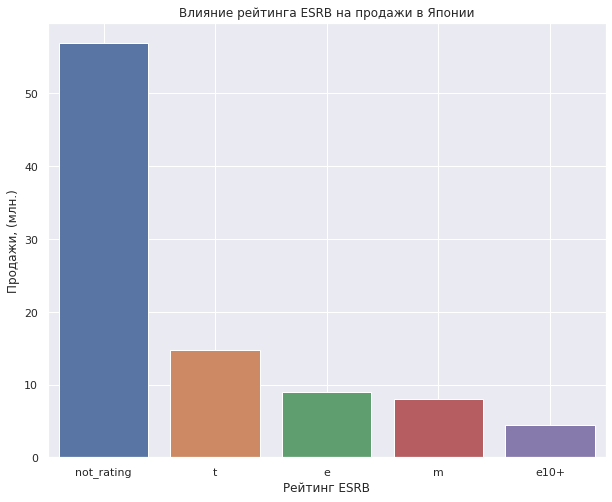

In [79]:
plot('rating', 'jp_sales', rating_jp, 'Рейтинг ESRB', 'Продажи, (млн.)', 'Влияние рейтинга ESRB на продажи в Японии')

Япония снова отличается от Европы и Северной Америки. В стране очень большой популярностью пользуются игры не имеющие рейтиг по каким-либо причинам. На втором месте идут игры предназначенные для подростков с рейтингом Т(13+). Игры с рейтингом для взрослых М(17+), занимают лишь 4 место.

**Вывод:**
    
После проведения анализа, можно составить портрет типичного пользователя каждого региона.

**Европа**

1. Самой популярной платформой является PS4.
2. Большей популярностью пользуются жанры action и shooter.
3. Самым большим спросом пользуются игры с рейтингом ESRB с категорией для взрослых М(17+).

**Северная Америка**

1. Самыми популярными платформами являются относящиеся к Playstation и Xbox.
2. Большей популярностью пользуются жанры action и shooter.
3. Самым большим спросом пользуются игры с рейтингом ESRB с категорией для взрослых М(17+).

**Япония**

1. Самой популярной платформой является 3DS.
2. Большей популярностью пользуются жанры role-playing и action.
3. Самым большим спросом пользуются игры не имеющие рейтинг и с рейтингом ESRB категорией для подростков Т(17+) и категорией для всех Е(6+).

### Проверка гипотезы

Для начала стоит проверить первую гипотезу: `"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"`.

Сформулирую нулевую и альтернативную гипотезы:

H_0: Пользовательские рейтинги (user_score) платформы "Xbox One" = Пользовательские рейтинги (user_score) платформы "PC"

H_a: Пользовательские рейтинги (user_score) платформы "Xbox One" ≠ Пользовательские рейтинги (user_score) платформы "PC"

alpha = 0.05

Для начала подготовлю данные для исследования.

In [80]:
xone = df_actual[df_actual['platform'] =='xone']
xone = xone[xone['user_score'].isna() == False]
pc = df_actual[df_actual['platform'] =='pc']
pc = pc[pc['user_score'].isna() == False]

Теперь посмотрю на распределение.

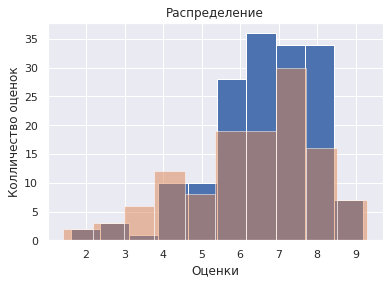

In [81]:
xone['user_score'].hist()
pc['user_score'].hist(alpha=0.5)
plt.xlabel('Оценки')
plt.ylabel('Колличество оценок')
plt.title('Распределение')
plt.show()

Распределение не нормальное. Теперь проверю гипотезу.

In [82]:
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)

alpha = 0.05
 
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод:** P-value больше alpha, что говорит о том, что есть вероятность получить одинаковые что средние пользовательские оценки для платформ Xbox One и PC. Так что отвергнуть нулеую гипотезу не удалось.

Теперь проверю вторую гипотезу: `"Средние пользовательские рейтинги жанров Action и Sports разные."`.

Сформулирую нулевую и альтернативную гипотезы:

H_0: Пользовательские рейтинги (user_score) жанра "Action" = Пользовательские рейтинги (user_score) жанра "Sports"

H_a: Пользовательские рейтинги (user_score) жанра "Action" ≠ Пользовательские рейтинги (user_score) жанра "Sports"

alpha = 0.05

Далее подготовлю данные для исследования.

In [83]:
action = df_actual[df_actual['genre'] =='action']
action = action[action['user_score'].isna() == False]
sports = df_actual[df_actual['genre'] =='sports']
sports = sports[sports['user_score'].isna() == False]

Опять же посмотрю на распределение.

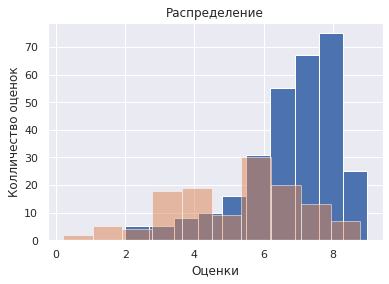

In [84]:
action['user_score'].hist()
sports['user_score'].hist(alpha=0.5)
plt.xlabel('Оценки')
plt.ylabel('Колличество оценок')
plt.title('Распределение')
plt.show()

Распределение не нормальное. Проверю гипотезу.

In [85]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

alpha = 0.05
 
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотеза отвергнута и значит мы принимаем альтернативную гипотезу, которая означает, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

При выполнении данного проекта было выполнено следущее:


- Проведена предобработка данных исходной таблицы:
    - обработаны пропуски;
    - данные приведены к общему регистру, для того чтобы исключить явные дубликаты;
    - данные преобразованы в нужные типы;
    - значения в данных приведено в соответствующий вид.
    

- Проведен исследовательский анализ данных, в котором можно отметить, что:
    - пик выпуска компьютерных игр пришелся на 2006-2011 годы;
    - с 2012 года происходит стабильный спад спроса на игры;
    - самые популярные платформы относятся к Playstation и Xbox;
    - в среднем, срок жизни платформы 10-12 лет;
    - пик продаж у платформы происходит на 4-5 год, далее продажи идут на спад;
    - новые платформы активно стали появляться с 2005 года;
    - отзывы критиков имеют небольшой вес на продажи игр, а вот оценки пользователей не влияют на продажи;
    - самыми популярными жанрами игр являются action и shooter;
    - к самым не популярным жанрам относятся интеллектуальные игры.
    
  
- Составлен портрет пользователя каждого региона:

    В Европе:
    - самой популярной платформой является PS4;
    - большей популярностью пользуются жанры action и shooter;
    - самым большим спросом пользуются игры с рейтингом ESRB с категорией для взрослых М(17+).
    
    В Северной Америке:
    - самыми популярными платформами являются относящиеся к Playstation и Xbox;
    - большей популярностью пользуются жанры action и shooter;
    - самым большим спросом пользуются игры с рейтингом ESRB с категорией для взрослых М(17+).
    
    В Японии:
    - самой популярной платформой является 3DS;
    - большей популярностью пользуются жанры role-playing и action;
    - самым большим спросом пользуются игры не имеющие рейтинг и с рейтингом ESRB категорией для подростков Т(17+) и категорией для всех Е(6+).


- Проверены гипотезы. В ходе проверки которых удалось подтвердить гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.